# Nomor 2 Mid - Test : Victoria Dataset
**Deskripsi :** <br>
Dataset berisi data deskripsi gedung, lingkungan, serta wilayah konservasi apartemen di Victoria yang terdiri atas 218 pengamatan. <br>
Terdapat 16 variabel dalam data, yaitu :
1. Total price
2. Area
3. Zone
4. Category
5. Age
6. Floor
7. Rooms
8. Out
9. Conservation
10. Toilets
11. Garage
12. Elevator
13. Street Category
14. Heating
15. Tras
16. Row_Labels

**Tujuan :** <br>
Menentukan model terbaik serta alasan mengapa atas masalah :<br>
Tony yang berprofesi sebagai broker ingin meramalkan harga apartemen di Victoria berdasarkan lingkungan ruang keluarga dan status konservasi apartemen. Tentukan model terbaik untuk memprediksi dan mendefinisikan kembali variabel konservasi baru dalam 3 level:
- A = 1A
- B = 2A 
- C = 2B dan 3A

## Load the Required Libraries

In [31]:
# For data loading and manipulation
import pandas as pd
import numpy as np
from scipy import stats

# For Visualization/EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For data science and machine learning techniques
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Import Dataset : Load the Dataset

In [32]:
df = pd.read_csv('victoria.csv')

Jawab :<br>
**Query yang dapat digunakan untuk load dan membagi data menjadi 2 bagian adalah seperti diatas**<br>
- Load dataset menggunakan pandas dataframe 'pd.read_csv'<br>

## 2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

In [33]:
#Head of data (default =5): 5 baris pertama dari data
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [34]:
#Tail of data (default =5): 5 baris terakhir dari data
df.tail()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
213,214,215000,7290000153,Z45,3B,18,3,4,E100,2A,1,0,0,S3,3A,1
214,215,340000,9561000061,Z56,2B,8,6,5,E50,1A,2,1,1,S3,3A,1
215,216,280000,8322000122,Z34,3B,29,7,5,E50,2B,1,1,1,S3,4A,1
216,217,224000,7920999908,Z38,4A,6,3,4,E100,1A,1,0,1,S3,3A,1
217,218,237000,8138999939,Z61,4B,20,2,4,E100,2B,1,0,1,S4,4A,1


In [35]:
df.shape

(218, 16)

In [36]:
df.mode().head(1)

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,270000,1061500015,Z41,3B,11.0,3.0,5.0,E100,1A,1.0,0.0,1.0,S3,3A,1.0


In [37]:
print(df.columns)

Index(['row.labels', 'totalprice', 'area', 'zone', 'category', 'age', 'floor',
       'rooms', 'out', 'conservation', 'toilets', 'garage', 'elevator',
       'streetcategory', 'heating', 'tras'],
      dtype='object')


In [38]:
df.median()

row.labels    109.5
age            16.0
floor           4.0
rooms           5.0
toilets         1.0
garage          0.0
elevator        1.0
tras            1.0
dtype: float64

In [39]:
df.isnull().sum()

row.labels        0
totalprice        0
area              0
zone              0
category          0
age               0
floor             0
rooms             0
out               0
conservation      0
toilets           0
garage            0
elevator          0
streetcategory    0
heating           0
tras              0
dtype: int64

In [40]:
#Info tipe data, dimensi, memory, dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.3+ KB


In [41]:
df.dtypes

row.labels         int64
totalprice        object
area              object
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage             int64
elevator           int64
streetcategory    object
heating           object
tras               int64
dtype: object

Dapat dilihat bahwa variabel 'totalprice' dan 'area' memiliki tipe *string*, maka perlu diubah menjadi tipe data *numerik*. Selanjutnya, masih terdapat ',' sebagai pemisah masing-masing angka dimana seharusnya pemisah yang digunakan adalah '.', sehingga perlu diubah agar dapat dilakukan analisis lebih lanjut menggunakan *regular expression*

In [42]:
#Regular Expression untuk mengubah pemisah (ekspresi) pada data
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [43]:
#Convert string to numeric
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
row.labels        218 non-null int64
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
age_range         218 non-null category
dtypes: category(1), int64(10), object(6)
memory usage: 27.6+ KB


In [45]:
df.describe().round(2)

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.00,218.00,2.180000e+02,218.0,218.00,218.00,218.00,218.00,218.0,218.00
mean,109.50,288543.54,5.718657e+09,19.9,4.44,4.85,1.47,0.24,0.8,0.81
std,63.08,128972.26,3.455007e+09,14.6,2.13,0.63,0.50,0.45,0.4,0.41
min,1.00,155000.00,5.300000e+01,1.0,1.00,3.00,1.00,0.00,0.0,0.00
25%,55.25,230000.00,1.187250e+09,11.0,3.00,5.00,1.00,0.00,1.0,1.00
50%,109.50,270000.00,7.118500e+09,16.0,4.00,5.00,1.00,0.00,1.0,1.00
75%,163.75,329750.00,8.542750e+09,24.0,5.00,5.00,2.00,0.00,1.0,1.00
max,218.00,1889822.00,9.992000e+09,118.0,12.00,7.00,2.00,2.00,1.0,2.00


**Method "Describe" diatas menghasilkan analisis statistika deskriptif, dimana dari hasil pada tabel tersebut dapat dilihat bahwa :**<br>
1. Rata-Rata usia apartemen tersebut adalah 20 dengan maksimum usia nya adalah 118 dan minimum usia nya adalah 1 dengan nilai persebaran setiap titik data ke nilai rata-rata adalah 14 yang cukup bagus.
2. Jumlah laintai di setiap apartemen yang rata-rata nya adalah 4 dengan maksimum jumlah lantai adalah 12 dan minimum jumlah lantai adalah 1.
3. Namun, dengan lantai yang cukup bervariasi di beberapa gedung, elevator dan toilet yang disediakan kurang memadai karena maksimum toilet dan elevator pada apartemen di Victoria adalah 2 dan 1 secara berurutan. 
4. Jumlah ruangan di setiap apartemen tsb rata-rata nya adalah 4 dengan maksimum jumlah ruangan adalah 7 dan minimum jumlah ruangan adalah 3.
5. dsb

Jawab :<br>
**Summary dari dataset dapat dilihat menggunakan query-query diatas, summary ini berguna untuk memahami data (Data Understanding) yang akan dianalisis agar menghasilkan analisis yang tepat dan sesuai.**<br>
**'Describe' adalah method yang paling umum untuk mengetahui langsung summary tentang data**<Br>
**Dapat disimpulkan bahwa data 'victoria.csv'** :<Br>
- Variabel memiliki tipe data yang beragam yaitu bersifat integer dan string<Br>
- Data memiliki dimensi (218, 16) yang artinya 218 rows dan 16 columns <br>
- Data tidak memiliki missing value<br>
- Rata-rata menunjukkan level data dalam analisis<br>
- Standar deviasi yang menunjukkan nilai persebaran setiap titik diantara nilai mean yang sesuai.<br>
- dsb.

In [52]:
df['floor'].unique()

array([ 3,  7,  8,  6,  4,  5,  2,  9, 12, 10,  1, 11], dtype=int64)

## 3. Data Visualization

### Pertama, membuat plot distribusi normal dan regresi linier.

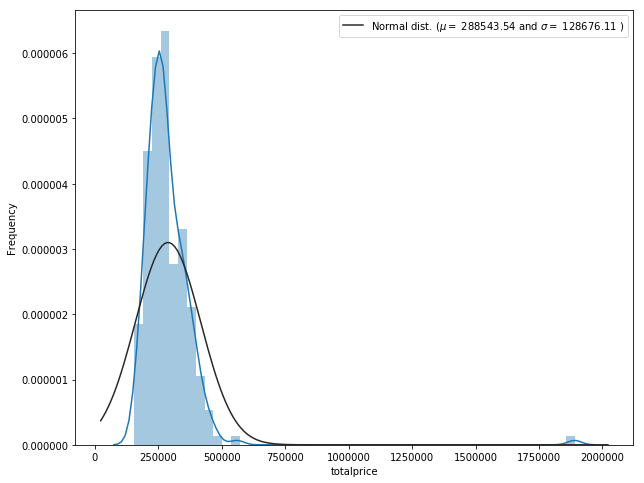

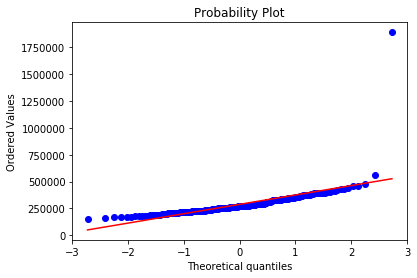

In [46]:
plt.subplots(figsize=(10,8))
sns.distplot(df['totalprice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['totalprice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['totalprice'], plot=plt)
plt.show()

**Dapat dilihat bahwa distribusi yang dihasilkan adalah cenderung ke kiri atau positive skewed normal distribution, maka harus ditransformasi.<br>
Transformasi ini menggunakan log function.**

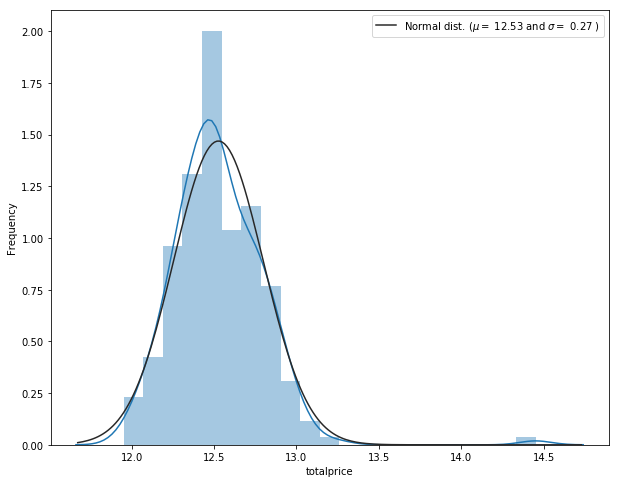

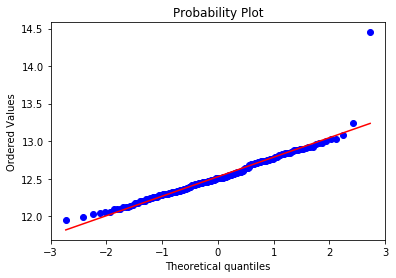

In [47]:
#we use log function which is in numpy
df['totalprice'] = np.log1p(df['totalprice'])

#Check again for more normal distribution

plt.subplots(figsize=(10,8))
sns.distplot(df['totalprice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['totalprice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['totalprice'], plot=plt)
plt.show()

**Dari hasil transformasi dapat dilihat bahwa distribusi nya sudah normal dan dapat dikatakan bahwa harga dari apartemen memiliki rata-rata = 12.53 atau kisaran 'totalprice' = 280000.**<br>
**Dapat dilihat jugfa bahwa 'totalprice' memiliki persebaran yang membentuk distribusi normal yang artinya 'totalprice' ini dapat dilakukan analisis lebih lanjut dengan model machine learning yang memngharuskan data bersifat distribusi normal.**

In [89]:
df = pd.read_csv('victoria.csv')
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

### Selanjutnya, dapat dilihat korelasi antar variabel menggunakan plot heatmap agar korelasi dapat mudah terlihat

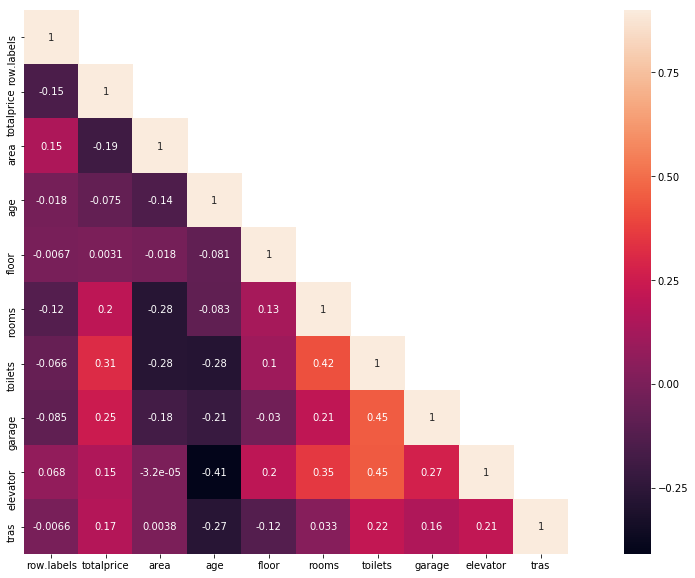

In [72]:
#create correlation with heatmap
corr = df.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Dapat dilihat bahwa korelasi tertinggi dari variabel-variable tersebut adalah** <br>
- 'garage' dan 'elevator' dengan 'toilets' sebesar 0.45 <br>
- 'toilets' dengan 'rooms' sebesar 0.42 <Br>
    
**yang dapat dikatakan bahwa terdapat korelasi positif yang lumayan tinggi antar dua variabel tersebut terutama adalah 'garage' dan 'elevator' dengan 'toilets'**<br>

**Juga dapat dilihat bahwa korelasi terendah dari variabel-variable tersebut adalah** <br>
- 'elevator' dengan 'age' sebesar -0.41 <Br>
- 'area' dengan 'rooms' dan 'toilets' sebesar -0.28 <br>

### Barplot Analysis dengan totalprice

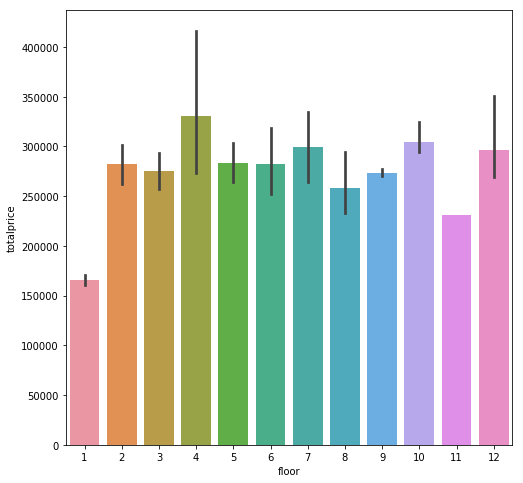

In [74]:
#Barplot analysis antara floors dengan totalprice
plt.figure(figsize=(8, 8))
sns.barplot(x=df.floor, y=df.totalprice)

**Dapat dilihat bahwa banyaknya lantai memberikan pengaruh kepada harga penjualan apartemen** :<br>
1. Dapat dilihat bahwa terdapat fluktuasi pergerakan harga terhadap jumlah lantai pada gedung dengan harga minimum pada jumlah lantai 1 dan harga maksimum pada jumlah lantai 4.
2. Seperti yang telah disebutkan sebelumnya, jumlah lantai apartemen yang memiliki kisaran harga rata-rata yaitu sebesar 280000 adalah apartemen dengan jumlah lantai 2 hingga 7.
3. Dengan harga maksimum pada jumlah lantai 4 dapat diasumsikan bahwa apartemen dengan jumlah lantai 4 kemungkinan merupakan yang paling banyak dicari oleh konsumen
4. Walaupun jumlah lantai apartemen berpengaruh terhdap harga apartemen namun semakin banyak jumlah lantainya tidak menjamin harganya juga akan semakin tinggi, harga apartemen di Victoria berdasarkan jumlah lantai nya adalah bervariasi dengan yang paling populer adalah apartemen dengan jumlah lantai 4.
5. dsb

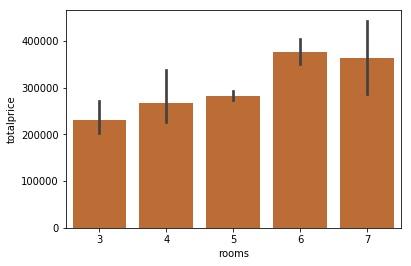

In [79]:
#Barplot analysis antara totalprice dan rooms
sns.barplot(data=df, x=df['rooms'], y=df['totalprice'], color='chocolate')

**Dapat dilihat bahwa banyaknya ruangan memberikan pengaruh kepada harga penjualan apartemen** :<br>
1. Dari plot diatas dapat dikatakan bahwa semakin banyak ruangannya maka semakin mahal harga apartemen tersebut

### Box plot Analysis with totalprice

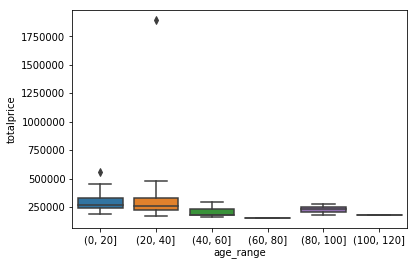

In [82]:
#Boxplot analysis antara age_range aprtemen ke dalam 20 range dengan totalprice
df['age_range'] = pd.cut(df['age'], bins=range(0, 121, 20))
ax = sns.boxplot(x="age_range", y="totalprice", data=df)

**Dapat dilihat bahwa usia apartemen memberikan pengaruh kepada harga penjualan apartemen tersebut** :<br>
1. Terdapat outlier harga pada range usia apartemen (0,20] dan (20,40]
2. Rentang usia apartemen dengan harga yang paling variatif adalah (20,40] yang berarti
3. Untuk rentang usia apartemen (60,80] dan (100,120] harga yang ditawarkan cenderung konstan dan tidak bervariasi yaitu +- sekitar 12
4. dsb

## 4. Variable Selection: Choose the variable and its reason.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
row.labels        218 non-null int64
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
age_range         218 non-null category
dtypes: category(1), int64(10), object(6)
memory usage: 27.6+ KB


**Dalam hal ini, saya akan memilih variabel yang bersifat numerik karena dalam pemodelan machine learning lebih mudah untuk di analisis, yakni variabel-variabel yang akan dipilih adalah :**<br>
- totalprice
- age
- floor
- rooms
- toilets
- garage
- elevator

**Dengan :**<br>
**variabel y =** 'totalprice'<br>
**variabel x =** 'age', 'floor', 'rooms', 'toilets', 'garage', 'elevator'

## 5. Modelling: Create models using Regression
Sebelum melakukan pemodelan perlu dilakukan penghapusan variabel data yang tidak dibutuhkan

In [90]:
model=['totalprice','toilets','garage','rooms', 'age', 'elevator', 'floor']
dfmodel=df[model]
dfmodel.head()

,totalprice,toilets,garage,rooms,age,elevator,floor
0,228000,1,0,5,33,1,3
1,409000,2,1,5,5,1,7
2,200000,2,0,5,14,1,8
3,180000,1,0,4,41,0,3
4,443600,2,0,7,22,1,6


In [91]:
#Membuat pd.get dummies
dfmodel = pd.get_dummies(dfmodel)

In [92]:
#Memakai Linear regression
lin_reg = LinearRegression()

In [94]:
#memisahkan variabel x dan y
x = dfmodel.drop(columns = ['totalprice'])
y = dfmodel['totalprice']

In [95]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [96]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
#melakukan prediksi (testing model)
y_pred = lin_reg.predict(x_test)

## 6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [98]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [99]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 66550.9358509333
Nilai MAPE 11.95481168212102)


## Kesimpulan
Dari hasil analisis diatas dapat disimpulkan bahwa linear regression algorithm dapat digunakan untuk memprediksi harga apartemen di Victoria berdasarkan kondisi gedung, lingkungan, dan konservasinya.<br>
Dari hasil linear regression model yang menggunakan variabel-variabel selection sebgaia berikut :
- variabel y = 'totalprice'<br>
- variabel x = 'age', 'floor', 'rooms', 'toilets', 'garage', 'elevator'

dengan pembangunan model menggunakan data training dari data yang sama dan prediksi dari data yang sama pula dengan fungsi :<br>
'x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)' <br>
dengan pembagian data :
- data training : 80%
- data testing : 20%

lalu dievaluasi menggunakan model evaluasi MAE (Mean Average Error) dan MAPE (Mean Average Percentage Error), dihasilkan nilai error sebesar :
- MAE : **66550.93**
- MAPE : **11.95%%%

Maka, dapat disimpulkan bahwa model menggunakan linear regression algorithm ini adalah model yang belum dapat dikatakan terbaik namun sudah cukup baik dalam akurasi dan error nya. Maka, prediksi harga apartemen di Victoria berdasarkan deskripsi data gedung, lingkungan, dan konservasi nya dapat menggunakan linear regression algorithm dengan beberapa analisis lebih lanjut, seperti:
1. Jumlah data yang lebih banyak
2. Melakukan percobaan Train Test Split yang lain
3. Menggunakan model evaluasi yang lain
4. Melakukan cross validation atau tuning parameter
5. dsb

Hasil dari prediksi harga apartemen di Victoria menggunakan pemodelan Linear Regression Algorithm ini dapat digunakan antara lain, untuk:
1. Menentukan harga penjualan apartemen yang akan mendatang oleh Tony
2. Melihat peluang pasar
3. Mebuat financial planning sebelum melakukan proses penjualan
4. Menentukan estimasi biaya untung dan modal dalam melakukan penjualan
5. dsb